In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import folium

In [3]:
os.chdir("C:\\Users\\Vukovic\\Downloads\\flights.csv")

In [4]:
flights=pd.read_csv('flights.csv')

C:\Users\Vukovic\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
os.chdir("C:\\Users\\Vukovic\\Downloads")

In [6]:
airports=pd.read_csv('airports.csv')

In [7]:
airlines=pd.read_csv('airlines.csv')

# Airlines

In [7]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [8]:
airlines.shape

(14, 2)

# Airports

In [8]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [9]:
airports.shape

(322, 7)

In [10]:
airports.info() #There were three null values in the LATITUDE and LONGITUDE columns, but I manually filled them in.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   322 non-null    float64
 6   LONGITUDE  322 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [11]:
len(airports['COUNTRY'].unique()) #number of different countries in dataset

1

In [12]:
print(airports['COUNTRY'].unique()[0])

USA


In [13]:
len(airports['STATE'].unique()) #number of different states in dataset

54

In [14]:
len(airports['CITY'].unique()) #number of different cities in dataset

308

In [15]:
num_of_airports_state=airports.groupby('STATE')['AIRPORT'].count() #the number of airports that the state has
num_of_airports_state.sort_values(ascending=False)

STATE
TX    24
CA    22
AK    19
FL    17
MI    15
NY    14
CO    10
WI     8
PA     8
ND     8
NC     8
MN     8
MT     8
IL     7
VA     7
LA     7
GA     7
WY     6
ID     6
MS     5
UT     5
TN     5
OR     5
OH     5
AL     5
IA     5
MO     5
MA     5
HI     5
AR     4
WA     4
IN     4
KS     4
KY     4
SC     4
AZ     4
NM     4
OK     3
NV     3
NE     3
NJ     3
SD     3
PR     3
ME     2
VI     2
RI     1
MD     1
GU     1
NH     1
VT     1
CT     1
DE     1
WV     1
AS     1
Name: AIRPORT, dtype: int64

In [16]:
num_of_airports_city=airports.groupby('CITY')['AIRPORT'].count() #the number of airports  city has.
num_of_airports_city=num_of_airports_city.sort_values(ascending=False)
num_of_airports_city

CITY
Columbia          2
Chicago           2
Columbus          2
Houston           2
Rochester         2
                 ..
Ft. Myers         1
Ft. Lauderdale    1
Fresno            1
Fort Wayne        1
Yuma              1
Name: AIRPORT, Length: 308, dtype: int64

In [17]:
#number of cities that have two airports
br=0
for i in range(num_of_airports_city.shape[0]):
    if num_of_airports_city[i]==2:
        br+=1
br        

14

In [18]:
airport_map=folium.Map(location=[airports['LATITUDE'].mean(), airports['LONGITUDE'].mean()],zoom_start=4)
for i in airports.index:
    xy=[airports.loc[i,'LATITUDE'], airports.loc[i,'LONGITUDE']]
    
    
    folium.Marker(xy).add_to(airport_map)
   

airport_map.save('airports.html') 

# Flights

In [19]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
flights.shape

(5819079, 31)

In [11]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [21]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [22]:
print(flights.isnull().any()) 

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool


In [23]:
print(flights.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [13]:
#the AIRLINE column in flights with full names - first, creating a dictionary
airline_fn = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict() 
airline_fn

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [14]:
flights['AIRLINE'] = flights['AIRLINE'].map(airline_fn) #name mapping

### FLIGHT DELAY ANALYSIS

In [26]:
flights[(flights['ARRIVAL_DELAY']==0)].shape #from this I can see that if the flight wasn't delayed, ARRIVAL_DELAY will be filled with zero—it won't remain nan.

(126213, 31)

C:\Users\Vukovic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


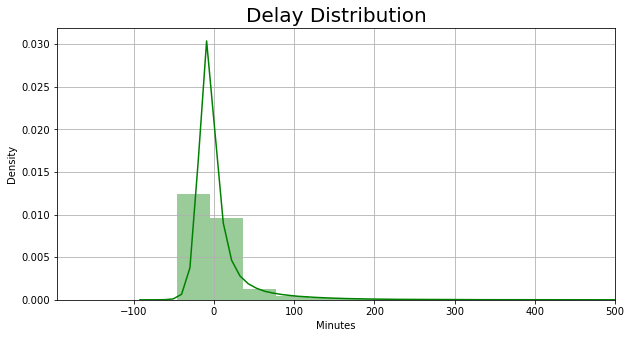

In [27]:
#delay distribution
plt.figure(figsize=(10,5))   
sns.distplot(flights.ARRIVAL_DELAY,color = 'Green')
plt.xlabel('Minutes')
plt.title('Delay Distribution', fontsize=20)
plt.xlim(right=500)
plt.grid()
plt.show() 

In [28]:
#calculating the probability that the flight is delayed
arrival_flights1=flights.dropna(subset=['ARRIVAL_DELAY']) #I'm removing from the dataset those entries where the ARRIVAL_DELAY column has missing values
na=arrival_flights1.shape[0] #the total number of such entries
number=arrival_flights1[(arrival_flights1['ARRIVAL_DELAY']>0)].shape[0] #I'm calculating the number of entries that were delayed
vv=number/na 
round(vv,2)

0.37

In [29]:
round(1-vv,2) #the probability that the flight arrive early or arrive on time

0.63

In [30]:
airline_arrival_delay=flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean() #the average delay for each airline.
aads=airline_arrival_delay.sort_values(ascending=False)
aads 

AIRLINE
Spirit Air Lines                14.471800
Frontier Airlines Inc.          12.504706
JetBlue Airways                  6.677861
Atlantic Southeast Airlines      6.585379
American Eagle Airlines Inc.     6.457873
Skywest Airlines Inc.            5.845652
United Air Lines Inc.            5.431594
Virgin America                   4.737706
Southwest Airlines Co.           4.374964
US Airways Inc.                  3.706209
American Airlines Inc.           3.451372
Hawaiian Airlines Inc.           2.023093
Delta Air Lines Inc.             0.186754
Alaska Airlines Inc.            -0.976563
Name: ARRIVAL_DELAY, dtype: float64

In [31]:
#now I want to display the distribution of delays from airlines with the highest, median, and lowest average delays.
fsalds=flights[(flights['AIRLINE']=='Spirit Air Lines')]
fualids=flights[(flights['AIRLINE']=='United Air Lines Inc.')]
faaids=flights[(flights['AIRLINE']=='Alaska Airlines Inc.')]

C:\Users\Vukovic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vukovic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vukovic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

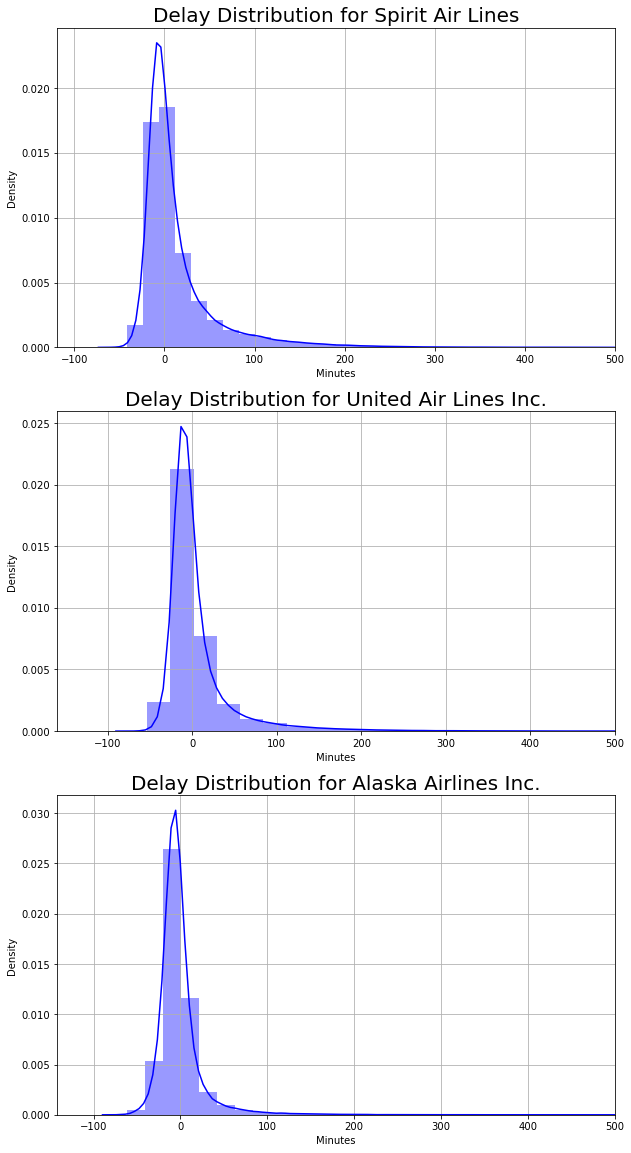

In [32]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.distplot(fsalds.ARRIVAL_DELAY,color = 'blue')
plt.xlabel('Minutes')
plt.title('Delay Distribution for Spirit Air Lines', fontsize=20)
plt.xlim(right=500)
plt.grid()
plt.subplot(3,1,2)
sns.distplot(fualids.ARRIVAL_DELAY,color = 'blue')
plt.xlabel('Minutes')
plt.title('Delay Distribution for United Air Lines Inc.', fontsize=20)
plt.xlim(right=500)
plt.grid()
plt.subplot(3,1,3)
sns.distplot(faaids.ARRIVAL_DELAY,color = 'blue')
plt.xlabel('Minutes')
plt.title('Delay Distribution for Alaska Airlines Inc.', fontsize=20)
plt.xlim(right=500)
plt.grid()
plt.show()

In [33]:
#probability of flight delay - Spirit Airlines
arrival_fsalds=fsalds.dropna(subset=['ARRIVAL_DELAY']) #izbacujem iz skupa podataka one kod kojih kolona ARRIVAL_DELAY ima nepopunjene vrednosti
na1=arrival_fsalds.shape[0] #racunam ukupan broj takvih
number1=arrival_fsalds[(arrival_fsalds['ARRIVAL_DELAY']>0)].shape[0] #racunam br onih koji su kasnili
vv1=number1/na1 
round(vv1,2)

0.49

In [34]:
#probability of flight delay  - United Air Lines Inc.
arrival_fualids=fualids.dropna(subset=['ARRIVAL_DELAY']) #izbacujem iz skupa podataka one kod kojih kolona ARRIVAL_DELAY ima nepopunjene vrednosti
na2=arrival_fualids.shape[0] #racunam ukupan broj takvih
number2=arrival_fualids[(arrival_fualids['ARRIVAL_DELAY']>0)].shape[0] #racunam br onih koji su kasnili
vv2=number2/na2 
round(vv2,2)

0.37

In [35]:
#probability of flight delay  - Alaska Airlines Inc.
arrival_faaids=faaids.dropna(subset=['ARRIVAL_DELAY']) #izbacujem iz skupa podataka one kod kojih kolona ARRIVAL_DELAY ima nepopunjene vrednosti
na3=arrival_faaids.shape[0] #racunam ukupan broj takvih
number3=arrival_faaids[(arrival_faaids['ARRIVAL_DELAY']>0)].shape[0] #racunam br onih koji su kasnili
vv3=number3/na3 
round(vv3,2)

0.33

In [36]:
#number of flights per month
months=flights['MONTH'].value_counts()
months=months.sort_index(ascending=True)
months

1     469968
2     429191
3     504312
4     485151
5     496993
6     503897
7     520718
8     510536
9     464946
10    486165
11    467972
12    479230
Name: MONTH, dtype: int64

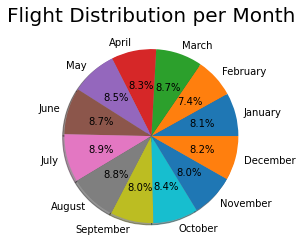

In [37]:
names_month=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.pie(months.values, labels = names_month, shadow = True, autopct='%1.1f%%')
plt.title('Flight Distribution per Month', fontsize=20)
plt.show() 

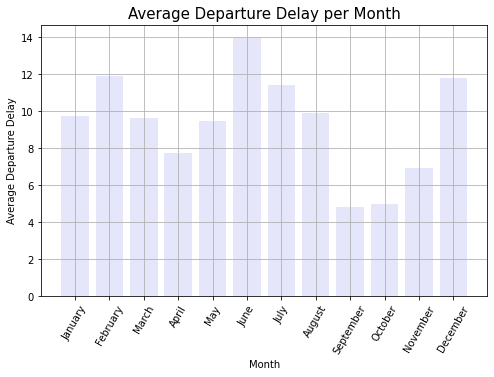

In [38]:
plt.figure(figsize=(8,5))
month_departure_delay=flights.groupby('MONTH')['DEPARTURE_DELAY'].mean() 
plt.bar(month_departure_delay.index, month_departure_delay.values, color='lavender')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay')
plt.title('Average Departure Delay per Month', fontsize=15)
plt.xticks(month_departure_delay.index, ['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=60)
plt.grid()
plt.show()

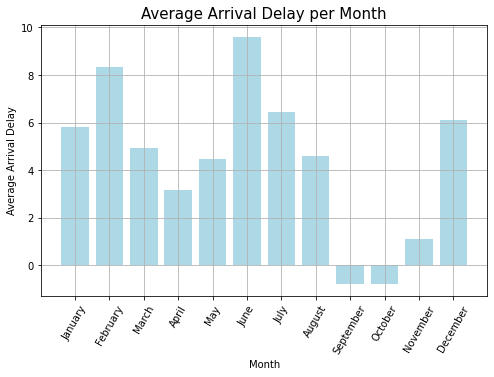

In [39]:
plt.figure(figsize=(8,5))
month_arrival_delay=flights.groupby('MONTH')['ARRIVAL_DELAY'].mean() 
plt.bar(month_arrival_delay.index, month_arrival_delay.values, color='lightblue')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay per Month', fontsize=15)
plt.xticks(month_arrival_delay.index, ['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=60)
plt.grid()
plt.show()

In [15]:
#number of flights for each airline
num_of_flights=flights['AIRLINE'].value_counts()
num_of_flights

Southwest Airlines Co.          1261855
Delta Air Lines Inc.             875881
American Airlines Inc.           725984
Skywest Airlines Inc.            588353
Atlantic Southeast Airlines      571977
United Air Lines Inc.            515723
American Eagle Airlines Inc.     294632
JetBlue Airways                  267048
US Airways Inc.                  198715
Alaska Airlines Inc.             172521
Spirit Air Lines                 117379
Frontier Airlines Inc.            90836
Hawaiian Airlines Inc.            76272
Virgin America                    61903
Name: AIRLINE, dtype: int64

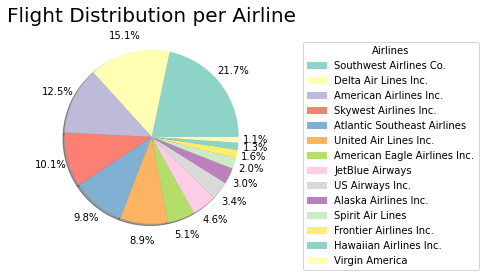

In [21]:
plt.pie(num_of_flights.values,  shadow = True, autopct='%1.1f%%', colors=sns.color_palette('Set3'), pctdistance=1.2)
plt.title('Flight Distribution per Airline',  fontsize=20)
plt.legend(num_of_flights.index,  bbox_to_anchor=(0.85, 0.85), title='Airlines', bbox_transform=plt.gcf().transFigure)
plt.show() 

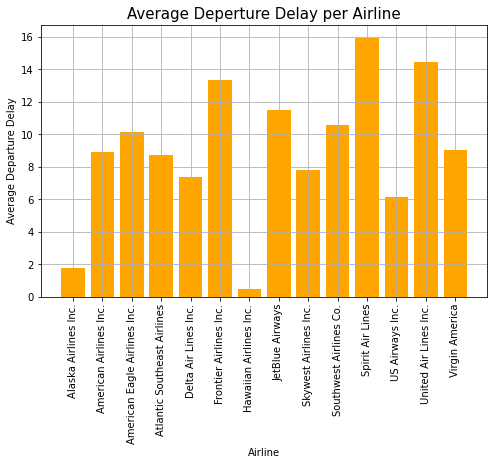

In [42]:
plt.figure(figsize=(8,5)) 
airline_departure_delay=flights.groupby('AIRLINE')['DEPARTURE_DELAY'].mean() #it is better to take the mean value than the sum because not all airlines have the same number of flights
plt.bar(airline_departure_delay.index, airline_departure_delay.values, color='orange')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay')
plt.title('Average Departure Delay per Airline', fontsize=15)
plt.xticks( rotation=90)
plt.grid()
plt.show()

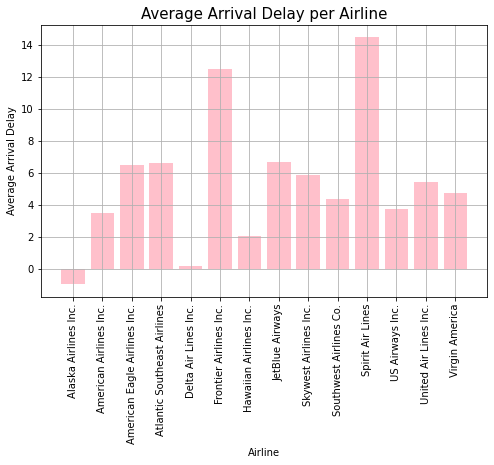

In [43]:
plt.figure(figsize=(8,5)) 
airline_arrival_delay=flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean() #it is better to take the mean value than the sum because not all airlines have the same number of flights
plt.bar(airline_arrival_delay.index, airline_arrival_delay.values, color='pink')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay per Airline', fontsize=15)
plt.xticks( rotation=90)
plt.grid()
plt.show()

In [119]:
#here I am checking if there is another reason for the flight delay besides the reasons listed in the table
broj=0
for i in range(0,flights.shape[0]):
    if  not pd.isna(flights.loc[i,'WEATHER_DELAY']) and not pd.isna(flights.loc[i,'SECURITY_DELAY']) and not pd.isna(flights.loc[i,'AIRLINE_DELAY']) and not pd.isna(flights.loc[i,'AIR_SYSTEM_DELAY']) and not pd.isna(flights.loc[i,'LATE_AIRCRAFT_DELAY']):
        
        suma=flights.loc[i,'LATE_AIRCRAFT_DELAY']+flights.loc[i,'SECURITY_DELAY']+flights.loc[i,'AIRLINE_DELAY']+flights.loc[i,'AIR_SYSTEM_DELAY']+flights.loc[i,'WEATHER_DELAY'] 
        
        if not flights.loc[i,'ARRIVAL_DELAY']==suma:
            broj+=1
        
broj            

0

In [44]:
#causes of delay
pd.options.display.float_format = '{:.1f}'.format 
flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].dropna().describe()

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1063439.0,1063439.0,1063439.0,1063439.0,1063439.0
mean,13.5,0.1,19.0,23.5,2.9
std,28.0,2.1,48.2,43.2,20.4
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,2.0,0.0,2.0,3.0,0.0
75%,18.0,0.0,19.0,29.0,0.0
max,1134.0,573.0,1971.0,1331.0,1211.0


In [45]:
new_colors = ["lightgreen", "lightgray", "lightblue", "lightpink", "lightyellow"]

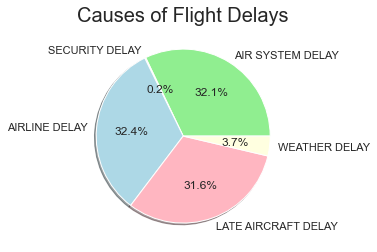

In [112]:
air_systemc=flights[(flights['AIR_SYSTEM_DELAY']>0)]['AIR_SYSTEM_DELAY'].count()  
securityc=flights[(flights['SECURITY_DELAY']>0)]['SECURITY_DELAY'].count()
airlinec=flights[(flights['AIRLINE_DELAY']>0)]['AIRLINE_DELAY'].count()
late_aircraftc=flights[(flights['LATE_AIRCRAFT_DELAY']>0)]['LATE_AIRCRAFT_DELAY'].count()
weatherc=flights[(flights['WEATHER_DELAY']>0)]['WEATHER_DELAY'].count()

yc = np.array([air_systemc, securityc, airlinec, late_aircraftc, weatherc])
mylabels = ["AIR SYSTEM DELAY", "SECURITY DELAY", "AIRLINE DELAY", "LATE AIRCRAFT DELAY","WEATHER DELAY"]

plt.pie(yc, labels = mylabels, shadow = True, autopct='%1.1f%%', colors=new_colors)
plt.title('Causes of Flight Delays', fontsize=20)
plt.show() 

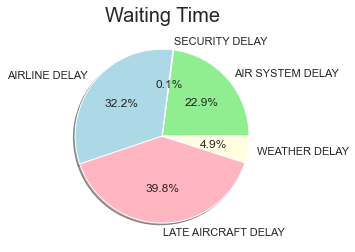

In [116]:
air_system=flights['AIR_SYSTEM_DELAY'].sum() #here I am looking for the reason for the longest wait
security=flights['SECURITY_DELAY'].sum() 
airline=flights['AIRLINE_DELAY'].sum() 
late_aircraft=flights['LATE_AIRCRAFT_DELAY'].sum()
weather=flights['WEATHER_DELAY'].sum() 

y = np.array([air_system, security, airline, late_aircraft, weather])
mylabels = ["AIR SYSTEM DELAY", "SECURITY DELAY", "AIRLINE DELAY", "LATE AIRCRAFT DELAY","WEATHER DELAY"]

plt.pie(y, labels = mylabels, shadow = True, autopct='%1.1f%%', colors=new_colors)
plt.title('Waiting Time', fontsize=20) 
plt.show() 

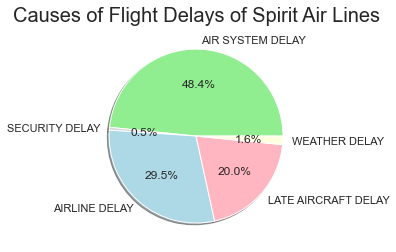

In [117]:
nk= flights[flights['AIRLINE'] == 'Spirit Air Lines'] #now I'm looking for the airline that has the highest average delay
air_system_nk1=nk[(nk['AIR_SYSTEM_DELAY']>0)]['AIR_SYSTEM_DELAY'].count() 
security_nk1=nk[(nk['SECURITY_DELAY']>0)]['SECURITY_DELAY'].count()
airline_nk1=nk[(nk['AIRLINE_DELAY']>0)]['AIRLINE_DELAY'].count()
late_aircraft_nk1=nk[(nk['LATE_AIRCRAFT_DELAY']>0)]['LATE_AIRCRAFT_DELAY'].count()
weather_nk1=nk[(nk['WEATHER_DELAY']>0)]['WEATHER_DELAY'].count()

y_nk1 = np.array([air_system_nk1, security_nk1, airline_nk1, late_aircraft_nk1, weather_nk1])
mylabels_nk = ["AIR SYSTEM DELAY", "SECURITY DELAY", "AIRLINE DELAY", "LATE AIRCRAFT DELAY","WEATHER DELAY"]

plt.pie(y_nk1, labels = mylabels_nk, shadow = True, autopct='%1.1f%%', colors=new_colors)
plt.title('Causes of Flight Delays of Spirit Air Lines', fontsize=20)
plt.show()

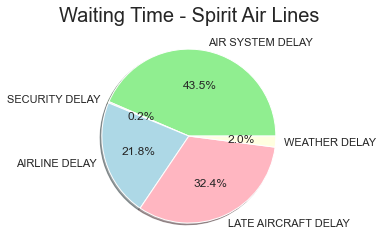

In [118]:
nk= flights[flights['AIRLINE'] == 'Spirit Air Lines']  
air_system_nk=nk['AIR_SYSTEM_DELAY'].sum() 
security_nk=nk['SECURITY_DELAY'].sum() 
airline_nk=nk['AIRLINE_DELAY'].sum() 
late_aircraft_nk=nk['LATE_AIRCRAFT_DELAY'].sum()
weather_nk=nk['WEATHER_DELAY'].sum() 

y_nk = np.array([air_system_nk, security_nk, airline_nk, late_aircraft_nk, weather_nk])
mylabels_nk = ["AIR SYSTEM DELAY", "SECURITY DELAY", "AIRLINE DELAY", "LATE AIRCRAFT DELAY","WEATHER DELAY"]

plt.pie(y_nk, labels = mylabels_nk, shadow = True, autopct='%1.1f%%', colors=new_colors)
plt.title('Waiting Time - Spirit Air Lines', fontsize=20) 
plt.show() 

In [50]:
#average airline delay due to problems with the airline
airline_delay=flights.groupby('AIRLINE')['AIRLINE_DELAY'].mean().sort_values(ascending=False)
airline_delay

AIRLINE
Delta Air Lines Inc.           22.9
Hawaiian Airlines Inc.         22.8
Atlantic Southeast Airlines    21.7
United Air Lines Inc.          21.1
American Airlines Inc.         21.1
Skywest Airlines Inc.          19.0
JetBlue Airways                18.2
American Eagle Airlines Inc.   17.4
US Airways Inc.                17.4
Southwest Airlines Co.         16.2
Alaska Airlines Inc.           15.5
Frontier Airlines Inc.         14.7
Spirit Air Lines               13.8
Virgin America                 11.1
Name: AIRLINE_DELAY, dtype: float64

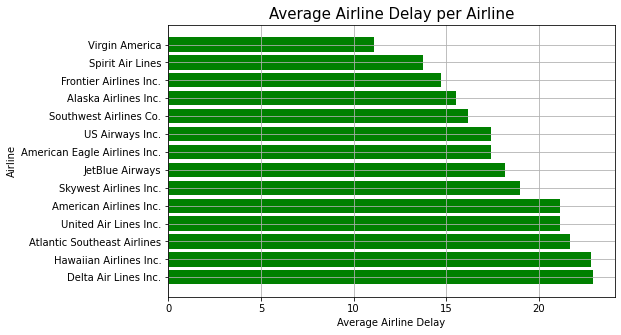

In [51]:
plt.figure(figsize=(8,5))
plt.barh(airline_delay.index, airline_delay.values, color='green')
plt.xlabel('Average Airline Delay')
plt.ylabel('Airline')
plt.title('Average Airline Delay per Airline', fontsize=15)
plt.grid()
plt.show()

In [52]:
airline_ds=flights[(flights['AIRLINE_DELAY']>0)].groupby('AIRLINE')['AIRLINE_DELAY'].count() #I'm counting how many times AIRLINE_DELAY occurs for each airline.
airline_ds=airline_ds.sort_values(ascending=False)
airline_ds

AIRLINE
Southwest Airlines Co.          144524
American Airlines Inc.           68656
United Air Lines Inc.            65999
Delta Air Lines Inc.             63128
Atlantic Southeast Airlines      53943
Skywest Airlines Inc.            39127
JetBlue Airways                  38665
American Eagle Airlines Inc.     27236
US Airways Inc.                  19717
Spirit Air Lines                 17307
Frontier Airlines Inc.           11517
Alaska Airlines Inc.              8363
Hawaiian Airlines Inc.            7395
Virgin America                    4445
Name: AIRLINE_DELAY, dtype: int64

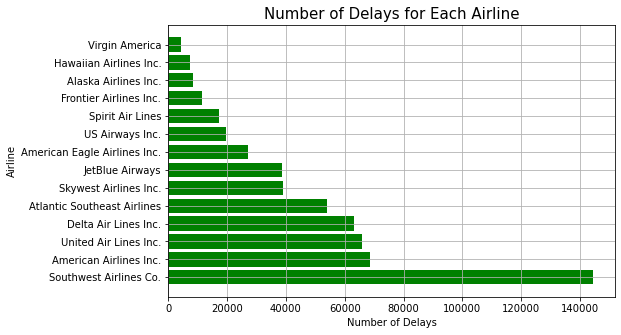

In [53]:
plt.figure(figsize=(8,5))
plt.barh(airline_ds.index, airline_ds.values, color='green')
plt.xlabel('Number of Delays')
plt.ylabel('Airline')
plt.title('Number of Delays for Each Airline', fontsize=15)
plt.grid()
plt.show()

In [54]:
flights[(flights['WEATHER_DELAY']>0)]['WEATHER_DELAY'].mean() #if there is a delay caused by bad weather, I calculate the average delay

47.90520118672353

In [55]:
flights[(flights['SECURITY_DELAY']>0)]['SECURITY_DELAY'].mean() #if there is a delay due to security reasons, the average delay is calculated

23.24483352468427

In [56]:
flights[(flights['AIRLINE_DELAY']>0)]['AIRLINE_DELAY'].mean() #if there is a delay due to problems with the airline, I calculate the average delay

35.389784955668375

In [57]:
flights[(flights['AIR_SYSTEM_DELAY']>0)]['AIR_SYSTEM_DELAY'].mean() #if there is a delay due to problems with the air system, I calculate the average delay

25.380846490777692

In [58]:
flights[(flights['LATE_AIRCRAFT_DELAY']>0)]['LATE_AIRCRAFT_DELAY'].mean() #if there is a delay due to other planes, the average delay is calculated

44.81873874456193

In [59]:
#merge datasets
new_flights=flights[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DISTANCE','WEATHER_DELAY','CANCELLED', 'CANCELLATION_REASON','DIVERTED', 'ARRIVAL_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY']].merge(airports,left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
new_flights.rename(columns = {'AIRPORT':'AIRPORT_O','CITY':'CITY_O','STATE':'STATE_O', 'COUNTRY':'COUNTRY_O', 'LATITUDE':'LATITUDE_O',
       'LONGITUDE':'LONGITUDE_O'}, inplace = True)

In [60]:
new_flights=new_flights.drop(['IATA_CODE'], axis=1)

In [61]:
new_flights1=new_flights.merge(airports,left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')

In [62]:
new_flights1.rename(columns = {'AIRPORT':'AIRPORT_D','CITY':'CITY_D','STATE':'STATE_D', 'COUNTRY':'COUNTRY_D', 'LATITUDE':'LATITUDE_D',
       'LONGITUDE':'LONGITUDE_D'}, inplace = True)

In [63]:
new_flights1=new_flights1.drop(['IATA_CODE'], axis=1)

In [64]:
new_flights1.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON,DIVERTED,ARRIVAL_DELAY,WEATHER_DELAY,AIRLINE_DELAY,...,STATE_O,COUNTRY_O,LATITUDE_O,LONGITUDE_O,AIRPORT_D,CITY_D,STATE_D,COUNTRY_D,LATITUDE_D,LONGITUDE_D
0,ANC,SEA,1448,NaN,0,NaN,0,-22.0,NaN,NaN,...,AK,USA,61.2,-150.0,Seattle-Tacoma International Airport,Seattle,WA,USA,47.4,-122.3
1,LAX,PBI,2330,NaN,0,NaN,0,-9.0,NaN,NaN,...,CA,USA,33.9,-118.4,Palm Beach International Airport,West Palm Beach,FL,USA,26.7,-80.1
2,SFO,CLT,2296,NaN,0,NaN,0,5.0,NaN,NaN,...,CA,USA,37.6,-122.4,Charlotte Douglas International Airport,Charlotte,NC,USA,35.2,-80.9
3,LAX,MIA,2342,NaN,0,NaN,0,-9.0,NaN,NaN,...,CA,USA,33.9,-118.4,Miami International Airport,Miami,FL,USA,25.8,-80.3
4,SEA,ANC,1448,NaN,0,NaN,0,-21.0,NaN,NaN,...,WA,USA,47.4,-122.3,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.2,-150.0


In [65]:
print(new_flights1.isnull().sum()) #I conclude that I don't have any information for many airports because there are airports in the flights data set that are not in the airports data set

ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
DISTANCE                     0
WEATHER_DELAY          4755640
CANCELLED                    0
CANCELLATION_REASON    5729195
DIVERTED                     0
ARRIVAL_DELAY           105071
WEATHER_DELAY          4755640
AIRLINE_DELAY          4755640
AIRPORT_O               486165
CITY_O                  486165
STATE_O                 486165
COUNTRY_O               486165
LATITUDE_O              486165
LONGITUDE_O             486165
AIRPORT_D               486165
CITY_D                  486165
STATE_D                 486165
COUNTRY_D               486165
LATITUDE_D              486165
LONGITUDE_D             486165
dtype: int64


In [66]:
int_br1=0  #there are not intigers
for i in airports['IATA_CODE']:
    if isinstance(i, int):
        int_br1 += 1

print(int_br1)

0


In [67]:
int_br=0  #there are intigers
for i in flights['DESTINATION_AIRPORT']:
    if isinstance(i, int):
        int_br += 1

print(int_br)

458752


In [68]:
#I decide to delete data about which I have no information
flights_n=new_flights1.dropna(subset=['AIRPORT_O','AIRPORT_D'])


In [69]:
flights_n.isnull().sum()

ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
DISTANCE                     0
WEATHER_DELAY          4329554
CANCELLED                    0
CANCELLATION_REASON    5245484
DIVERTED                     0
ARRIVAL_DELAY           101784
WEATHER_DELAY          4329554
AIRLINE_DELAY          4329554
AIRPORT_O                    0
CITY_O                       0
STATE_O                      0
COUNTRY_O                    0
LATITUDE_O                   0
LONGITUDE_O                  0
AIRPORT_D                    0
CITY_D                       0
STATE_D                      0
COUNTRY_D                    0
LATITUDE_D                   0
LONGITUDE_D                  0
dtype: int64

In [70]:
flights_n.shape

(5332914, 22)

In [71]:
flights_n['ROUTE'] = flights_n['CITY_O'] + '-' +flights_n['CITY_D'] 

<ipython-input-71-cdfc430d1a48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_n['ROUTE'] = flights_n['CITY_O'] + '-' +flights_n['CITY_D']


In [113]:
flights_n['ROUTE'].value_counts()[:10] # routes that appear most frequently in the dataset

San Francisco-Los Angeles    13744
Los Angeles-San Francisco    13457
New York-Chicago             13432
Chicago-New York             13336
Boston-New York              12140
New York-Boston              12140
New York-Los Angeles         12016
Los Angeles-New York         12015
Atlanta-Chicago              11037
Chicago-Atlanta              10924
Name: ROUTE, dtype: int64

In [73]:
# the first 10 routes that are delayed most often on average
route_d=flights_n.groupby('ROUTE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)
route_d[:10]

ROUTE
Chantilly-Trenton              381.0
Newburgh-West Palm Beach       260.5
Richmond-Columbia              228.0
Raleigh-Indianapolis           208.0
Kalispell-Missoula             148.0
Newburgh-Ft. Myers             140.0
Oakland-Ft. Lauderdale         106.0
Oklahoma City-Ft. Lauderdale    90.0
Jackson-New York                89.0
Denver-Peoria                   84.8
Name: ARRIVAL_DELAY, dtype: float64

In [74]:
#10 routes that appear to be correct the most in the data set
not_d=flights_n[(flights_n['ARRIVAL_DELAY']==0)]
not_d['ROUTE'].value_counts()[:10]

Honolulu-Kahului             398
Kahului-Honolulu             392
Honolulu-Kailua/Kona         354
San Francisco-Los Angeles    347
Kailua/Kona-Honolulu         315
Honolulu-Lihue               315
Los Angeles-San Francisco    308
Honolulu-Hilo                280
Atlanta-Orlando              250
Los Angeles-Las Vegas        249
Name: ROUTE, dtype: int64

In [75]:
#10 flights with the biggest delay
p= flights_n.sort_values(by='ARRIVAL_DELAY', ascending=False)[:10]
p[['AIRPORT_O', 'AIRPORT_D', 'ARRIVAL_DELAY']]

,AIRPORT_O,AIRPORT_D,ARRIVAL_DELAY
337720,Birmingham-Shuttlesworth International Airport,Dallas/Fort Worth International Airport,1971.0
3412085,Richmond International Airport,Dallas/Fort Worth International Airport,1898.0
4103531,San Diego International Airport (Lindbergh Field),Dallas/Fort Worth International Airport,1665.0
5279939,Detroit Metropolitan Airport,Chicago O'Hare International Airport,1638.0
3100911,Indianapolis International Airport,Los Angeles International Airport,1636.0
5810811,Albuquerque International Sunport,Dallas/Fort Worth International Airport,1636.0
886984,St. Louis International Airport at Lambert Field,Miami International Airport,1627.0
1278418,Eppley Airfield,Dallas/Fort Worth International Airport,1598.0
264495,McCarran International Airport,Los Angeles International Airport,1593.0
949876,Honolulu International Airport,Los Angeles International Airport,1576.0


In [76]:
#10 flights with the least delays
p2= flights_n.sort_values(by='ARRIVAL_DELAY', ascending=True)[:10]
p2[['AIRPORT_O', 'AIRPORT_D', 'ARRIVAL_DELAY']]

,AIRPORT_O,AIRPORT_D,ARRIVAL_DELAY
1093297,Honolulu International Airport,Phoenix Sky Harbor International Airport,-87.0
1467349,Phoenix Sky Harbor International Airport,Dallas/Fort Worth International Airport,-87.0
316347,Newark Liberty International Airport,Seattle-Tacoma International Airport,-82.0
1836251,Newark Liberty International Airport,Los Angeles International Airport,-81.0
5136512,John F. Kennedy International Airport (New Yor...,McCarran International Airport,-80.0
5645762,Adak Airport,Ted Stevens Anchorage International Airport,-80.0
3627775,Dallas/Fort Worth International Airport,Miami International Airport,-80.0
561640,Honolulu International Airport,Salt Lake City International Airport,-79.0
1030608,Gen. Edward Lawrence Logan International Airport,San Francisco International Airport,-78.0
697022,Huntsville International Airport,Hartsfield-Jackson Atlanta International Airport,-77.0


In [114]:
#show on the map the first 10 flights with the biggest delay and the 10 flights that were the most early
mapa1=folium.Map(location=[p['LATITUDE_D'].mean(), p['LONGITUDE_D'].mean()],zoom_start=4)
for i in p.index:
    xy1=[p.loc[i,'LATITUDE_O'], p.loc[i,'LONGITUDE_O']]
    xy2=[p.loc[i,'LATITUDE_D'], p.loc[i,'LONGITUDE_D']]
    folium.PolyLine([xy1, xy2], color='red', weight=2).add_to(mapa1)
    folium.Marker(xy1).add_to(mapa1)
    folium.Marker(xy2).add_to(mapa1)

for i in p2.index:
    xy1=[p2.loc[i,'LATITUDE_O'], p2.loc[i,'LONGITUDE_O']]
    xy2=[p2.loc[i,'LATITUDE_D'], p2.loc[i,'LONGITUDE_D']]
    folium.PolyLine([xy1, xy2], color='green', weight=2).add_to(mapa1)    
    folium.Marker(xy1).add_to(mapa1)
    folium.Marker(xy2).add_to(mapa1)


mapa1.save('mapa1.html') 

In [77]:
#8 of the longest flights
d1= flights_n.sort_values(by='DISTANCE', ascending=False)

d1=d1[['AIRPORT_O', 'AIRPORT_D', 'DISTANCE', 'LATITUDE_O', 'LATITUDE_D', 'LONGITUDE_O', 'LONGITUDE_D']].drop_duplicates()[:16] #uzimam 16 jer se racunaju oba smera
d1

,AIRPORT_O,AIRPORT_D,DISTANCE,LATITUDE_O,LATITUDE_D,LONGITUDE_O,LONGITUDE_D
2973123,John F. Kennedy International Airport (New Yor...,Honolulu International Airport,4983,40.6,21.3,-73.8,-157.9
2699275,Honolulu International Airport,John F. Kennedy International Airport (New Yor...,4983,21.3,40.6,-157.9,-73.8
2686821,Honolulu International Airport,Newark Liberty International Airport,4962,21.3,40.7,-157.9,-74.2
2989744,Newark Liberty International Airport,Honolulu International Airport,4962,40.7,21.3,-74.2,-157.9
1995695,Honolulu International Airport,Washington Dulles International Airport,4817,21.3,38.9,-157.9,-77.5
2389506,Washington Dulles International Airport,Honolulu International Airport,4817,38.9,21.3,-77.5,-157.9
1764833,Hartsfield-Jackson Atlanta International Airport,Honolulu International Airport,4502,33.6,21.3,-84.4,-157.9
5137151,Honolulu International Airport,Hartsfield-Jackson Atlanta International Airport,4502,21.3,33.6,-157.9,-84.4
1688975,Honolulu International Airport,Chicago O'Hare International Airport,4243,21.3,42.0,-157.9,-87.9
446835,Chicago O'Hare International Airport,Honolulu International Airport,4243,42.0,21.3,-87.9,-157.9


In [78]:
#8 closest flights - some repeat 
d2= flights_n.sort_values(by='DISTANCE', ascending=True)
d2=d2[['AIRPORT_O', 'AIRPORT_D', 'DISTANCE', 'LATITUDE_O', 'LATITUDE_D', 'LONGITUDE_O', 'LONGITUDE_D']].drop_duplicates()[:10]
d2

,AIRPORT_O,AIRPORT_D,DISTANCE,LATITUDE_O,LATITUDE_D,LONGITUDE_O,LONGITUDE_D
1714902,Newark Liberty International Airport,John F. Kennedy International Airport (New Yor...,21,40.7,40.6,-74.2,-73.8
5472728,Petersburg James A. Johnson Airport,Wrangell Airport,31,56.8,56.5,-132.9,-132.4
5576227,Wrangell Airport,Petersburg James A. Johnson Airport,31,56.5,56.8,-132.4,-132.9
2802502,Gustavus Airport,Juneau International Airport,41,58.4,58.4,-135.7,-134.6
3132674,Juneau International Airport,Gustavus Airport,41,58.4,58.4,-134.6,-135.7
4904082,Pellston Regional Airport of Emmet County,Chippewa County International Airport,49,45.6,46.3,-84.8,-84.5
578448,Stewart International Airport,LaGuardia Airport (Marine Air Terminal),52,41.5,40.8,-74.1,-73.9
5235120,Miami International Airport,Palm Beach International Airport,62,25.8,26.7,-80.3,-80.1
3654277,Savannah/Hilton Head International Airport,Brunswick Golden Isles Airport,62,32.1,31.3,-81.2,-81.5
1023809,Chicago O'Hare International Airport,General Mitchell International Airport,67,42.0,42.9,-87.9,-87.9


In [115]:
#I show the 8 nearest and 8 furthest flights on the map
mapaa=folium.Map(location=[d1['LATITUDE_D'].mean(), d1['LONGITUDE_D'].mean()],zoom_start=4)
for i in d1.index:
    xy1=[d1.loc[i,'LATITUDE_O'], d1.loc[i,'LONGITUDE_O']]
    xy2=[d1.loc[i,'LATITUDE_D'], d1.loc[i,'LONGITUDE_D']]
    folium.PolyLine([xy1, xy2], color='purple', weight=2).add_to(mapaa)
    

for i in d2.index:
    xy1=[d2.loc[i,'LATITUDE_O'], d2.loc[i,'LONGITUDE_O']]
    xy2=[d2.loc[i,'LATITUDE_D'], d2.loc[i,'LONGITUDE_D']]
    folium.PolyLine([xy1, xy2], color='blue', weight=2).add_to(mapaa)    
    


mapaa.save('mapaa2.html')

# Cancellation

In [79]:
flights['CANCELLED'].value_counts() #number of canceled and non-cancelled flights

0    5729195
1      89884
Name: CANCELLED, dtype: int64

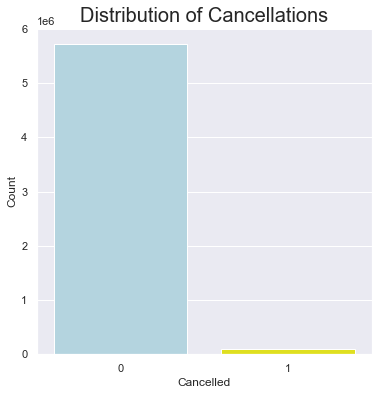

In [80]:
sns.set(style='darkgrid')
plt.figure(figsize=(6, 6))
sns.barplot(x=flights['CANCELLED'].value_counts().index, y=flights['CANCELLED'].value_counts().values, palette={0:'lightblue',1:'yellow'})
plt.xlabel('Cancelled')

plt.ylabel('Count')
plt.title('Distribution of Cancellations', fontsize=20)
plt.show()

In [82]:
flights[(flights['CANCELLED']==1)]['CANCELLATION_REASON'].isnull().sum() #here I check how many canceled flights there are without knowing the reason for the cancellation

0

In [83]:
#number of each cancellation reason
reason=flights[(flights['CANCELLED']==1)]['CANCELLATION_REASON'].value_counts()
reason=reason.sort_index(ascending=True)
reason

A    25262
B    48851
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

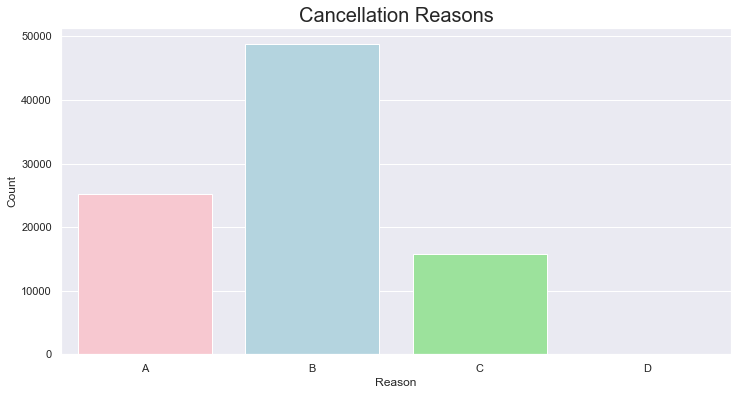

In [84]:
# A - Airline/Carrier; B - Weather; C - National Air System; D - Security
plt.figure(figsize=(12, 6)) 
sns.barplot(x = reason.index, y = reason.values, color='pink', palette = {'A':'pink', 'B':'lightblue', 'C':'lightgreen','D':'yellow'})
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Cancellation Reasons', fontsize=20)
plt.show()

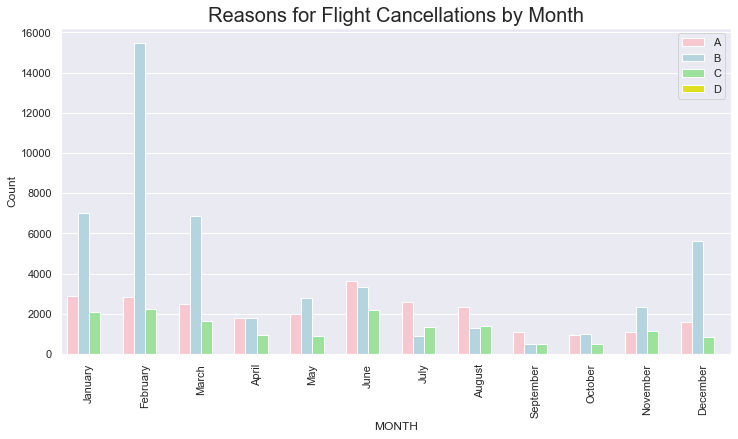

In [85]:
plt.figure(figsize=(12,6))
sns.countplot(x = "MONTH", hue = "CANCELLATION_REASON", data = flights, palette = {'A':'pink', 'B':'lightblue', 'C':'lightgreen','D':'yellow'})
plt.ylabel("Count")
plt.title('Reasons for Flight Cancellations by Month', fontsize=20)
plt.legend(loc='upper right')
plt.xticks(range(12), ['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=90)
plt.show()

In [86]:
flights_n['AIRPORT_O'].value_counts() #it can be noticed that there is a big difference in the number of flights from each airport

Hartsfield-Jackson Atlanta International Airport    346836
Chicago O'Hare International Airport                285884
Dallas/Fort Worth International Airport             239551
Denver International Airport                        196055
Los Angeles International Airport                   194673
                                                     ...  
St. Cloud Regional Airport                              83
Gustavus Airport                                        77
Dillingham Airport                                      77
King Salmon Airport                                     63
Ithaca Tompkins Regional Airport                        34
Name: AIRPORT_O, Length: 322, dtype: int64

In [87]:
flights_n.groupby('AIRPORT_O')['CANCELLED'].mean().sort_values(ascending=False)[:5] #because of the upper cell, it is necessary to do the mean value

AIRPORT_O
Ithaca Tompkins Regional Airport                 0.1
Mammoth Yosemite Airport                         0.1
Friedman Memorial Airport                        0.1
Devils Lake Regional Airport                     0.1
Del Norte County Airport (Jack McNamara Field)   0.1
Name: CANCELLED, dtype: float64

In [88]:
flights_n.groupby('AIRPORT_O')['CANCELLED'].sum().sort_values(ascending=False)[:5] #and here I am looking from which airport the flights were canceled the most in the data set

AIRPORT_O
Chicago O'Hare International Airport                8548
Dallas/Fort Worth International Airport             6254
LaGuardia Airport (Marine Air Terminal)             4531
Newark Liberty International Airport                3110
Gen. Edward Lawrence Logan International Airport    2654
Name: CANCELLED, dtype: int64

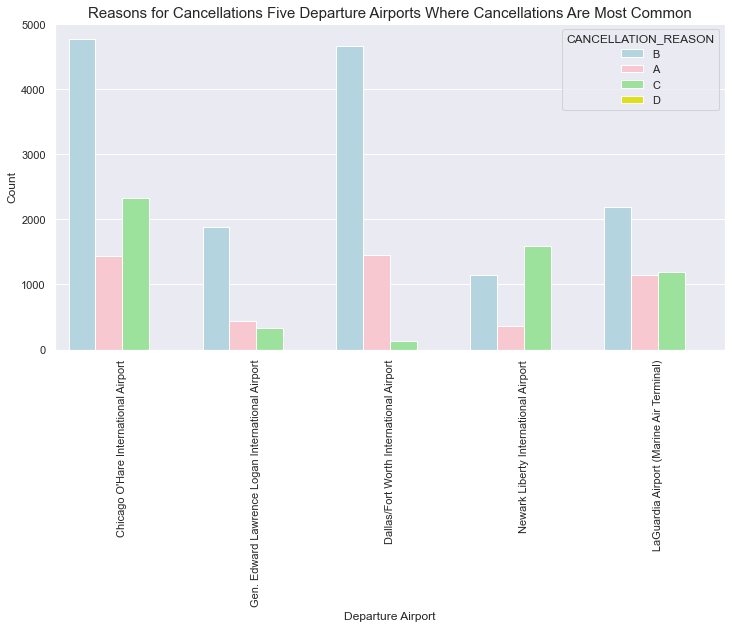

In [89]:
ds_coa=flights_n[ (flights_n['AIRPORT_O']=="Chicago O'Hare International Airport") | (flights_n['AIRPORT_O']=='Dallas/Fort Worth International Airport') | (flights_n['AIRPORT_O']=='LaGuardia Airport (Marine Air Terminal)') | (flights_n['AIRPORT_O']=='Newark Liberty International Airport')| (flights_n['AIRPORT_O']=='Gen. Edward Lawrence Logan International Airport')]
plt.figure(figsize=(12,6))
sns.countplot(x = "AIRPORT_O", hue = "CANCELLATION_REASON", data = ds_coa, palette = {'A':'pink', 'B':'lightblue', 'C':'lightgreen','D':'yellow'})
plt.ylabel("Count")
plt.xlabel("Departure Airport")
plt.xticks(rotation=90)
plt.title('Reasons for Cancellations Five Departure Airports Where Cancellations Are Most Common', fontsize=15)
plt.show()

In [90]:
flights_n['AIRPORT_D'].value_counts() # the same analysis for DESTINATION AIRPORT

Hartsfield-Jackson Atlanta International Airport    346904
Chicago O'Hare International Airport                285906
Dallas/Fort Worth International Airport             239582
Denver International Airport                        196010
Los Angeles International Airport                   194696
                                                     ...  
St. Cloud Regional Airport                              82
Gustavus Airport                                        77
Dillingham Airport                                      77
King Salmon Airport                                     63
Ithaca Tompkins Regional Airport                        35
Name: AIRPORT_D, Length: 322, dtype: int64

In [91]:
flights_n.groupby('AIRPORT_D')['CANCELLED'].mean().sort_values(ascending=False)[:5]

AIRPORT_D
Ithaca Tompkins Regional Airport   0.1
Mammoth Yosemite Airport           0.1
Devils Lake Regional Airport       0.1
Adak Airport                       0.1
Muskegon County Airport            0.1
Name: CANCELLED, dtype: float64

In [92]:
flights_n.groupby('AIRPORT_D')['CANCELLED'].sum().sort_values(ascending=False)[:5]

AIRPORT_D
Chicago O'Hare International Airport                9273
Dallas/Fort Worth International Airport             6749
LaGuardia Airport (Marine Air Terminal)             4418
Newark Liberty International Airport                3350
Hartsfield-Jackson Atlanta International Airport    2715
Name: CANCELLED, dtype: int64

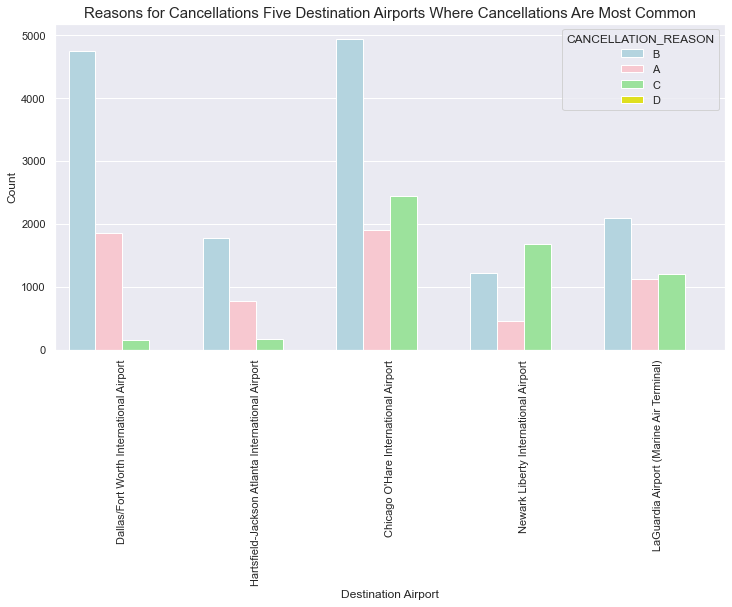

In [93]:
ds_coa=flights_n[ (flights_n['AIRPORT_D']=="Chicago O'Hare International Airport") | (flights_n['AIRPORT_D']=='Dallas/Fort Worth International Airport') | (flights_n['AIRPORT_D']=='LaGuardia Airport (Marine Air Terminal)') | (flights_n['AIRPORT_D']=='Newark Liberty International Airport')| (flights_n['AIRPORT_D']=='Hartsfield-Jackson Atlanta International Airport')]
plt.figure(figsize=(12,6))
sns.countplot(x = "AIRPORT_D", hue = "CANCELLATION_REASON", data = ds_coa, palette = {'A':'pink', 'B':'lightblue', 'C':'lightgreen','D':'yellow'})
plt.ylabel("Count")
plt.xlabel("Destination Airport")
plt.xticks(rotation=90)
plt.title('Reasons for Cancellations Five Destination Airports Where Cancellations Are Most Common', fontsize=15)
plt.show()

In [94]:
flights_n.groupby('CITY_O')['CANCELLED'].sum().sort_values(ascending=False)[:5]

CITY_O
Chicago              10507
New York              6453
Dallas-Fort Worth     6254
Newark                3110
Houston               2904
Name: CANCELLED, dtype: int64

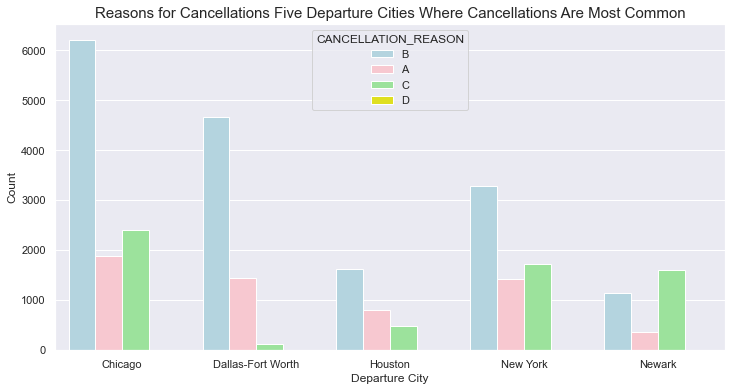

In [95]:
ds_co=flights_n[ (flights_n['CITY_O']=='Chicago') | (flights_n['CITY_O']=='New York') | (flights_n['CITY_O']=='Dallas-Fort Worth') | (flights_n['CITY_O']=='Newark')| (flights_n['CITY_O']=='Houston')]
plt.figure(figsize=(12,6))
sns.countplot(x = "CITY_O", hue = "CANCELLATION_REASON", data = ds_co, palette = {'A':'pink', 'B':'lightblue', 'C':'lightgreen','D':'yellow'})
plt.ylabel("Count")
plt.xlabel("Departure City")
plt.title('Reasons for Cancellations Five Departure Cities Where Cancellations Are Most Common', fontsize=15)
plt.show()

In [96]:
new_flights1.groupby('CITY_D')['CANCELLED'].sum().sort_values(ascending=False)[:5]

CITY_D
Chicago              11126
Dallas-Fort Worth     6749
New York              6394
Newark                3350
Houston               3208
Name: CANCELLED, dtype: int64

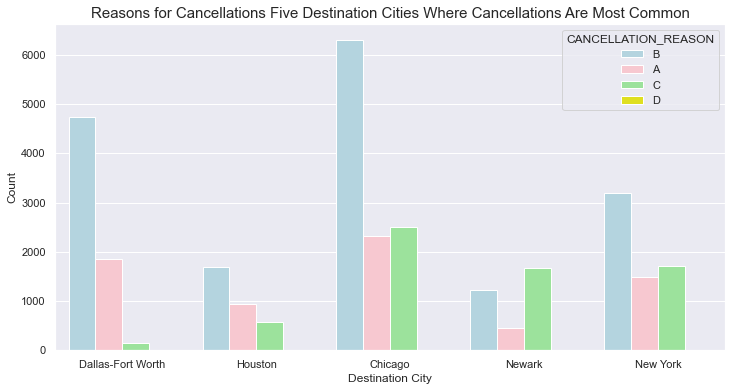

In [97]:

ds_do=flights_n[ (flights_n['CITY_D']=='Chicago') | (flights_n['CITY_D']=='New York') | (flights_n['CITY_D']=='Dallas-Fort Worth') | (flights_n['CITY_D']=='Newark')| (flights_n['CITY_D']=='Houston')]
plt.figure(figsize=(12,6))
sns.countplot(x = 'CITY_D', hue = 'CANCELLATION_REASON', data = ds_do, palette = {'A':'pink', 'B':'lightblue', 'C':'lightgreen','D':'yellow'})
plt.ylabel('Count')
plt.xlabel('Destination City')
plt.title('Reasons for Cancellations Five Destination Cities Where Cancellations Are Most Common', fontsize=15)
plt.show()

In [98]:
flights_n.groupby('ROUTE')['CANCELLED'].mean().sort_values(ascending=False)[:5]

ROUTE
Newark-New York      1.0
Savannah-Brunswick   1.0
Lubbock-Amarillo     1.0
Phoenix-Manchester   1.0
Chantilly-Albany     1.0
Name: CANCELLED, dtype: float64

In [99]:
#top 5 most frequently canceled routes in the dataset
can_r=flights_n.groupby('ROUTE')['CANCELLED'].sum().sort_values(ascending=False)[:5]
can_r

ROUTE
Boston-New York       592
New York-Boston       589
New York-Chicago      573
Chicago-New York      544
Arlington-New York    448
Name: CANCELLED, dtype: int64

In [100]:
ds_r=flights_n[(flights_n['ROUTE']=='Boston-New York') | (flights_n['ROUTE']=='New York-Boston') | (flights_n['ROUTE']=='New York-Chicago') | (flights_n['ROUTE']=='Chicago-New York') | (flights_n['ROUTE']=='Arlington-New York')]

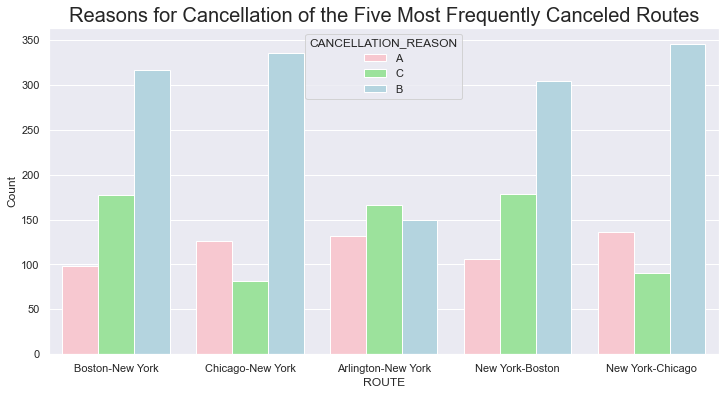

In [101]:
plt.figure(figsize=(12,6))
sns.countplot(x = "ROUTE", hue = "CANCELLATION_REASON", data = ds_r, palette = {'A':'pink', 'B':'lightblue', 'C':'lightgreen','D':'yellow'})
plt.ylabel("Count")
plt.title('Reasons for Cancellation of the Five Most Frequently Canceled Routes', fontsize=20)
plt.show()

In [102]:
# number of canceled flights for each airline in the dataset
air_cancelled=flights.groupby('AIRLINE')['CANCELLED'].sum() 
air_cancelled
air_cancelled=air_cancelled.sort_values(ascending=False) 
air_cancelled

AIRLINE
Southwest Airlines Co.          16043
Atlantic Southeast Airlines     15231
American Eagle Airlines Inc.    15025
American Airlines Inc.          10919
Skywest Airlines Inc.            9960
United Air Lines Inc.            6573
JetBlue Airways                  4276
US Airways Inc.                  4067
Delta Air Lines Inc.             3824
Spirit Air Lines                 2004
Alaska Airlines Inc.              669
Frontier Airlines Inc.            588
Virgin America                    534
Hawaiian Airlines Inc.            171
Name: CANCELLED, dtype: int64

In [103]:
# mean
air_cancelledm=flights.groupby('AIRLINE')['CANCELLED'].mean() 

air_cancelledm=air_cancelledm.sort_values(ascending=False) 
air_cancelledm

AIRLINE
American Eagle Airlines Inc.   0.1
Atlantic Southeast Airlines    0.0
US Airways Inc.                0.0
Spirit Air Lines               0.0
Skywest Airlines Inc.          0.0
JetBlue Airways                0.0
American Airlines Inc.         0.0
United Air Lines Inc.          0.0
Southwest Airlines Co.         0.0
Virgin America                 0.0
Frontier Airlines Inc.         0.0
Delta Air Lines Inc.           0.0
Alaska Airlines Inc.           0.0
Hawaiian Airlines Inc.         0.0
Name: CANCELLED, dtype: float64

In [104]:
cancair=flights[(flights['CANCELLATION_REASON']=='A')]

In [105]:
f=cancair.groupby('AIRLINE')['CANCELLED'].sum().sort_values(ascending=False) 
f

AIRLINE
Southwest Airlines Co.          6122
Atlantic Southeast Airlines     3604
Skywest Airlines Inc.           3205
American Airlines Inc.          2879
United Air Lines Inc.           2870
American Eagle Airlines Inc.    2475
US Airways Inc.                 1007
JetBlue Airways                  883
Spirit Air Lines                 654
Delta Air Lines Inc.             594
Alaska Airlines Inc.             334
Frontier Airlines Inc.           308
Hawaiian Airlines Inc.           170
Virgin America                   157
Name: CANCELLED, dtype: int64

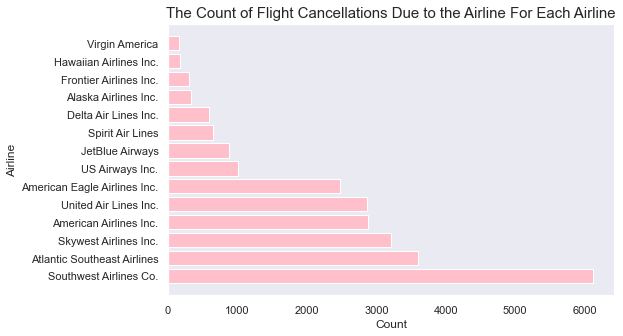

In [106]:
plt.figure(figsize=(8,5))
plt.barh(f.index, f.values, color='pink')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.title('The Count of Flight Cancellations Due to the Airline For Each Airline', fontsize=15)
plt.grid()
plt.show()

In [107]:
flights_n['DIVERTED'].value_counts() #if the graphics are displayed, the diverted flights are not visible on the graph at all

0    5318560
1      14354
Name: DIVERTED, dtype: int64

In [108]:

div=flights_n[(flights_n['DIVERTED']==1)]
div.isna().sum()

ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
DISTANCE                   0
WEATHER_DELAY          14354
CANCELLED                  0
CANCELLATION_REASON    14354
DIVERTED                   0
ARRIVAL_DELAY          14354
WEATHER_DELAY          14354
AIRLINE_DELAY          14354
AIRPORT_O                  0
CITY_O                     0
STATE_O                    0
COUNTRY_O                  0
LATITUDE_O                 0
LONGITUDE_O                0
AIRPORT_D                  0
CITY_D                     0
STATE_D                    0
COUNTRY_D                  0
LATITUDE_D                 0
LONGITUDE_D                0
ROUTE                      0
dtype: int64

In [109]:
div['AIRPORT_D'].value_counts()[:10] #which airports were visited the most during flight diversions

Hartsfield-Jackson Atlanta International Airport    1113
Dallas/Fort Worth International Airport             1069
Chicago O'Hare International Airport                 769
Denver International Airport                         667
George Bush Intercontinental Airport                 664
LaGuardia Airport (Marine Air Terminal)              636
Chicago Midway International Airport                 553
Orlando International Airport                        350
Baltimore-Washington International Airport           315
Los Angeles International Airport                    301
Name: AIRPORT_D, dtype: int64

In [110]:
 div['CITY_D'].value_counts()[:10] #which cities were visited the most when rerouting flights

Chicago              1322
Atlanta              1113
Dallas-Fort Worth    1069
Houston               915
New York              882
Denver                667
Orlando               350
Baltimore             315
Los Angeles           301
Newark                257
Name: CITY_D, dtype: int64